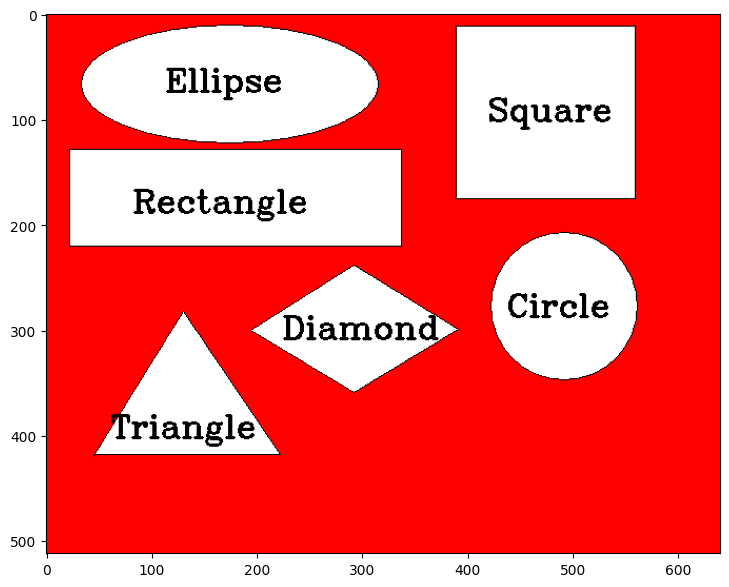

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 載入圖片
img=cv2.imread("./exam1-1.bmp")
# 轉灰階
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 二值化
_, threshold = cv2.threshold(img_gray, 245, 255, cv2.THRESH_BINARY_INV)
# 找輪廓
contours, _ = cv2.findContours(threshold, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
contours=contours[1:]
for cnt in contours:
    epsilon = 0.01*cv2.arcLength(cnt, True)
    approx = cv2.approxPolyDP(cnt, epsilon, True)
    # 根據夾角判斷形狀
    x,y = approx[0][0]
    if len(approx) == 3:
        cv2.putText(img, "Triangle", (x+15, y-15), cv2.FONT_HERSHEY_COMPLEX, 1, 0,2)
    elif len(approx) == 4:
        # 根據長寬、邊緣元素判斷形狀
        x, y , w, h = cv2.boundingRect(approx)
        aspectRatio = float(w)/h
        tmp=img[y: y+w, x: x+h, 2]
        if(len(np.unique(tmp[0]))==1):
            if aspectRatio >= 0.95 and aspectRatio < 1.05:
                cv2.putText(img, "Square", (x+30, y+90), cv2.FONT_HERSHEY_COMPLEX, 1, 0,2)
            else:
                cv2.putText(img, "Rectangle", (x+60, y+60), cv2.FONT_HERSHEY_COMPLEX, 1, 0,2)
        else:
            cv2.putText(img, "Diamond", (x+30, y+70), cv2.FONT_HERSHEY_COMPLEX, 1, 0,2)
    elif 6 < len(approx) < 15:
        cv2.putText(img, "Ellipse", (x+80, y+10), cv2.FONT_HERSHEY_COMPLEX, 1, 0,2)
    else:
        cv2.putText(img, "Circle", (x-50, y+80), cv2.FONT_HERSHEY_COMPLEX, 1, 0,2)
plt.figure(figsize=(10, 7))
plt.imshow(img[:, :, ::-1])

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img=cv2.imread("./exam1-1.bmp")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, threshold = cv2.threshold(img_gray, 245, 255, cv2.THRESH_BINARY_INV)
contours, _ = cv2.findContours(threshold, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
contours=contours[1:]
for cnt in contours:
    epsilon = 0.01*cv2.arcLength(cnt, True)
    approx = cv2.approxPolyDP(cnt, epsilon, True)
    x,y = approx[0][0]
    if len(approx) == 3:
        cv2.putText(img, "Triangle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 1, 0,2)
    elif len(approx) == 4:
        x, y , w, h = cv2.boundingRect(approx)
        aspectRatio = float(w)/h
        tmp=img[y: y+w, x: x+h, 2]
        if(len(np.unique(tmp[0]))==1):
            if aspectRatio >= 0.95 and aspectRatio < 1.05:
                cv2.putText(img, "Square", (x, y), cv2.FONT_HERSHEY_COMPLEX, 1, 0,2)
            else:
                cv2.putText(img, "Rectangle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 1, 0,2)
        else:
            cv2.putText(img, "Diamond", (x, y), cv2.FONT_HERSHEY_COMPLEX, 1, 0,2)
    elif 6 < len(approx) < 15:
        cv2.putText(img, "Ellipse", (x, y), cv2.FONT_HERSHEY_COMPLEX, 1, 0,2)
    else:
        cv2.putText(img, "Circle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 1, 0,2)
plt.figure(figsize=(10, 7))
plt.imshow(img[:, :, ::-1])